 **Ashmika Gupte(33228)**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Checking if data cleaning is required

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
print(df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


Hence the dataset is clean

# Exploratory Data Analysis 

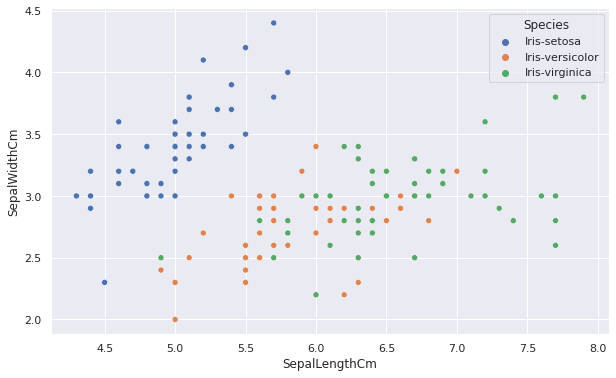

In [ ]:
plt.figure(figsize = (10,6))
sns.set(style="darkgrid")
sns.scatterplot(data=df,x="SepalLengthCm",y='SepalWidthCm',hue="Species")

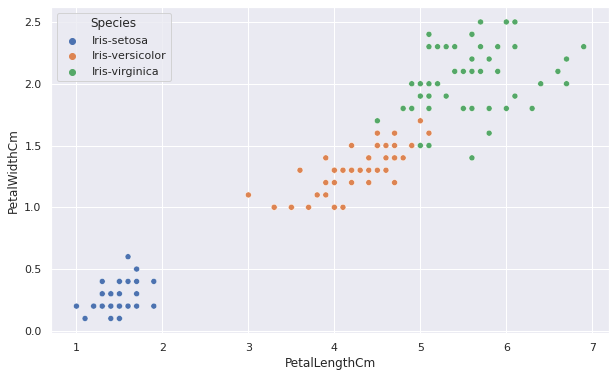

In [ ]:
plt.figure(figsize = (10,6))
sns.set(style="darkgrid")
sns.scatterplot(data=df,x="PetalLengthCm",y='PetalWidthCm',hue="Species")

####**Conclusion:**
Iris-setosa are very easy to identify whereas the other 2 are mostly similar in nature.

# Visualizing Correlation

In [ ]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [ ]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000,0.717,-0.398,0.883,0.900
SepalLengthCm,0.717,1.000,-0.109,0.872,0.818
SepalWidthCm,-0.398,-0.109,1.000,-0.421,-0.357
PetalLengthCm,0.883,0.872,-0.421,1.000,0.963
PetalWidthCm,0.900,0.818,-0.357,0.963,1.000


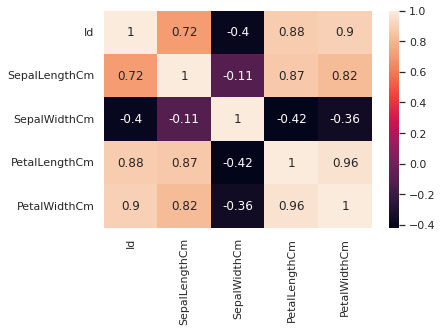

In [ ]:
sns.heatmap(df.corr(), annot = True)

# Setting dependeant and independant variables

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

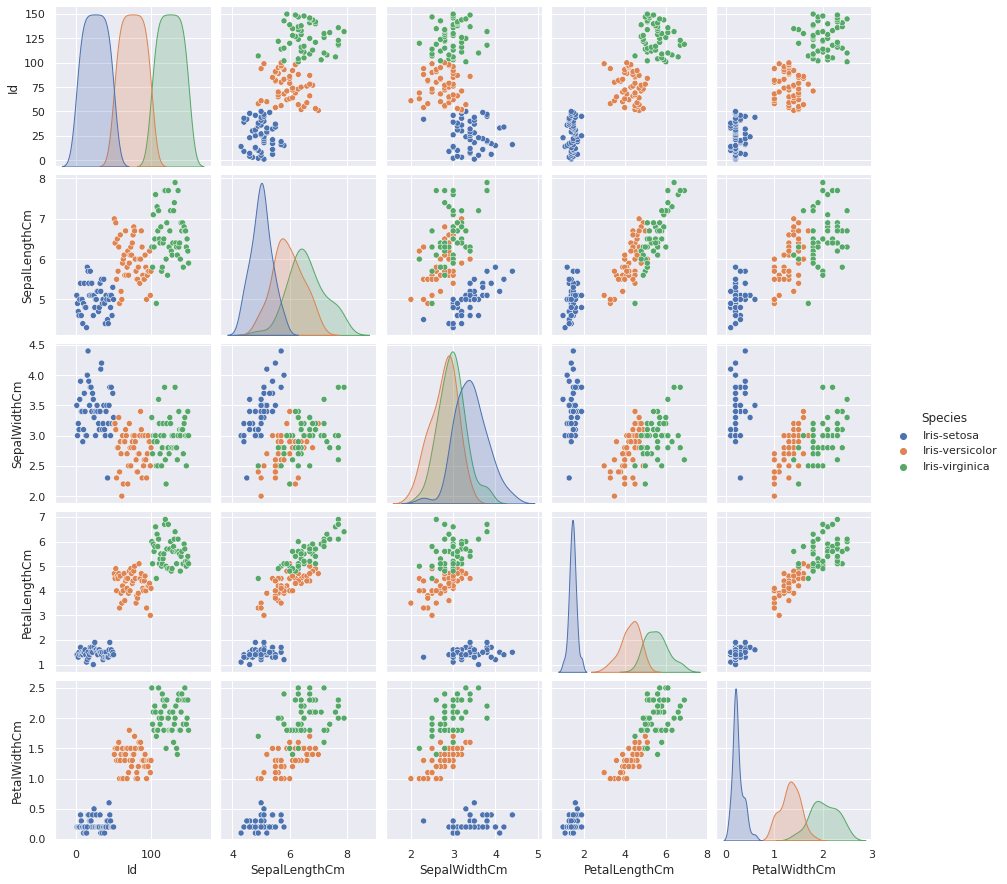

In [ ]:
p=sns.pairplot(df, hue = 'Species')

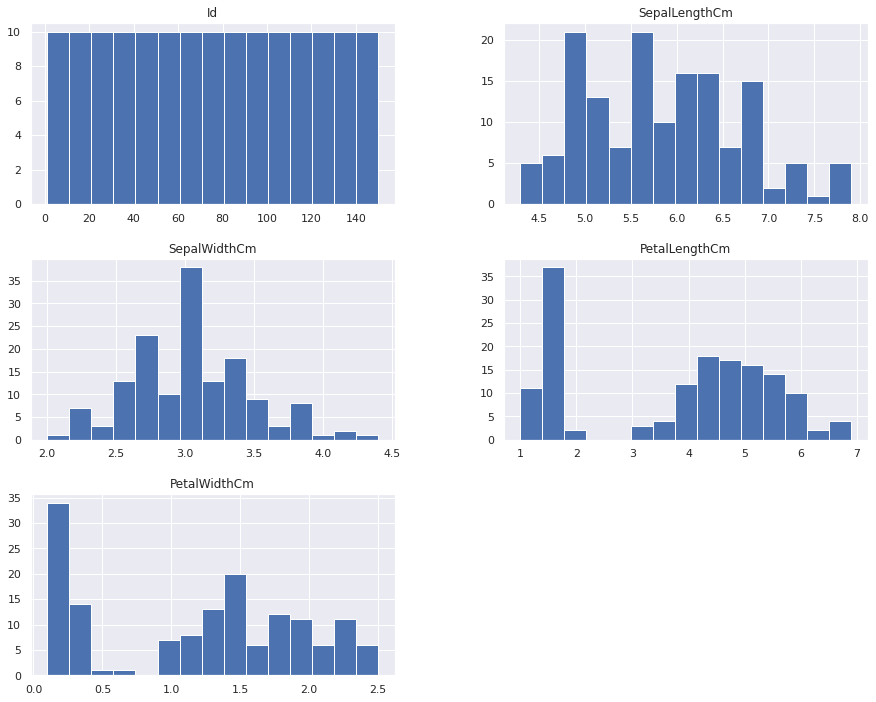

In [ ]:
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

As we see, the dependant varaible y does not contain numerical values, so we need to apply encoding on the categorical data

## Encoding categorical data

### Encoding the Dependent Variable

In [ ]:
# LabelEncoder for encoding binary categories in a column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()  # One single vector so it is ovbious what we want to encode, so no need of anything in the parenthesis
y = le.fit_transform(y)

In [ ]:
print(y)
# 0 - Iris-setosa
# 1 - Iris-versicolor
# 2 - Iris-virginica

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
print(X_train)

[[ 0.34899193  0.31553662 -0.03612186  0.44748582  0.2345312 ]
 [ 1.34449565  2.2449325  -0.03612186  1.29803965  1.39642889]
 [-0.14875993 -0.2873996  -1.240184    0.0505607  -0.15276803]
 [ 1.18612006  0.67729835 -0.51774672  1.01452171  1.13822941]
 [ 0.86936888 -0.04622511 -0.51774672  0.73100376  1.52552864]
 [-0.62388671 -0.64916132  1.64956512 -1.31032543 -1.31466572]
 [-0.51076129 -0.40798684 -1.72180885  0.10726429  0.10543146]
 [-1.0763884  -0.76974857  0.92712784 -1.36702901 -1.31466572]
 [-0.4881362   0.79788559 -0.51774672  0.44748582  0.36363094]
 [ 0.73361837  1.03906007 -1.240184    1.12792888  0.75093018]
 [ 0.82411871  1.15964732 -0.03612186  0.95781812  1.13822941]
 [-1.32526433 -0.89033581  1.16794027 -1.36702901 -1.18556598]
 [ 0.9824943   0.19494938 -1.96262128  0.67430017  0.36363094]
 [ 0.62049295  0.5567111  -0.27693429  1.01452171  0.75093018]
 [-0.39763586  0.91847283 -0.27693429  0.44748582  0.10543146]
 [ 0.95986922  2.2449325  -0.99937157  1.75166836  1.39

In [ ]:
print(X_test)

[[-1.43333771 -0.07829545  1.70946556 -1.3642592  -1.32113381]
 [ 0.70901759 -0.94366618 -1.53635513 -0.31929471 -0.0287203 ]
 [ 0.1224203   0.91069968 -0.4544149   0.49345546  0.4020842 ]
 [-1.38232925 -0.57279301  1.49307752 -1.30620562 -1.03393081]
 [ 1.55065717  2.51781676  1.27668947  1.65452712  1.26369321]
 [-0.36216006  0.53982651  0.19474924  0.6676162   0.68928721]
 [ 1.80569946  1.28157285 -0.23802685  0.89983054  1.69449772]
 [-0.66821082 -0.94366618  1.27668947 -0.95788412 -1.03393081]
 [-1.05077426 -1.43816375 -0.0216388  -1.13204487 -1.32113381]
 [ 1.27011064  1.28157285 -0.0216388   1.24815204  1.69449772]
 [ 0.60700067 -0.32554423 -1.10357903  0.37734829  0.2584827 ]
 [-1.66287578 -0.57279301  1.49307752 -1.07399129 -1.03393081]
 [ 0.81103451  1.52882163 -0.4544149   1.3642592   1.40729472]
 [-0.48968121  0.6634509  -0.0216388   0.55150904  0.54568571]
 [ 0.19893299  0.16895333 -0.67080294  0.55150904  0.54568571]
 [-0.71921928 -1.80903692 -0.0216388  -1.30620562 -1.32

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Testing the model

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [2 1]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [2 2]]


## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


0.9666666666666667

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



# Similarly evaluating performance for different classifiers

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_1 = LogisticRegression()
classifier_1.fit(X_train,y_train)

y_pred_1 = classifier_1.predict(X_test)

print(accuracy_score(y_test, classifier.predict(X_test)))

0.9666666666666667


# SVM

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(accuracy_score(y_test, classifier.predict(X_test)))

0.9666666666666667


# Kernal-SVM

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(accuracy_score(y_test, classifier.predict(X_test)))

0.9666666666666667


# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(accuracy_score(y_test, classifier.predict(X_test)))

0.9666666666666667


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(accuracy_score(y_test, classifier.predict(X_test)))

0.8666666666666667


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(accuracy_score(y_test, classifier.predict(X_test)))

0.9


***
Conclusion:
We get a highest accuracy 96.67% for Logistic Regression, SVM, Kernal-SVM, KNN and Naive Bayes 
***

# Modelling **with** PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(X)

In [ ]:
pca.get_covariance()

array([[ 1.88750000e+03,  2.57828859e+01, -7.49228188e+00,
         6.76677852e+01,  2.98322148e+01],
       [ 2.57828859e+01,  6.85693512e-01, -3.92684564e-02,
         1.27368233e+00,  5.16903803e-01],
       [-7.49228188e+00, -3.92684564e-02,  1.88004027e-01,
        -3.21712752e-01, -1.17981208e-01],
       [ 6.76677852e+01,  1.27368233e+00, -3.21712752e-01,
         3.11317942e+00,  1.29638747e+00],
       [ 2.98322148e+01,  5.16903803e-01, -1.17981208e-01,
         1.29638747e+00,  5.82414318e-01]])

In [ ]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([9.99319101e-01, 5.14403271e-04, 1.17857591e-04, 3.66217226e-05,
       1.20165058e-05])

### Cumulative explained variance ratio

In [ ]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[1.89078098e+03 9.73286632e-01 2.22994729e-01 6.92908368e-02
 2.27360616e-02]
[9.99319101e-01 5.14403271e-04 1.17857591e-04 3.66217226e-05
 1.20165058e-05]
[0.9993191  0.9998335  0.99995136 0.99998798 1.        ]


In [ ]:
# component loadings
loadings = pca.components_
print(loadings)

[[-0.99913157 -0.01365776  0.00396685 -0.0358369  -0.01579744]
 [-0.04071433  0.49432522 -0.01499187  0.82236709  0.2783389 ]
 [-0.00712756 -0.55014214 -0.77852879  0.29611241  0.05918769]
 [-0.00497451 -0.6110462   0.54687614  0.19490229  0.53808678]
 [ 0.00170534 -0.28181947  0.30753685  0.44357483 -0.79324481]]


In [ ]:
! pip install bioinfokit
# get biplot
from bioinfokit.visuz import cluster
from bioinfokit.analys import get_data

# load iris dataset
df = get_data('iris').data
df.head(2)

X = df.iloc[:,0:4]
target = df['class'].to_numpy()

X_st =  StandardScaler().fit_transform(X)
pca_out = PCA().fit(X_st)



     |████████████████████████████████| 84 kB 2.8 MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.0.6-py3-none-any.whl size=57066 sha256=65407a497b6940b2e77ed21d020129320162905aa286f776bccd7fcbc62a0bda
  Stored in directory: /root/.cache/pip/wheels/38/b2/a0/3f65c463d3faababa8cb5f3076e3bfc1c49fea2a736a49038a
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7094 sha256=a957352fb6f476b0060dc0dda2135f9e1680adecf1cb04b707d832117bf4a5bd
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built bioinfokit adjustText


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# component loadings
loadings = pca_out.components_
print(loadings)


[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]
 [-0.72101681  0.24203288  0.14089226  0.6338014 ]
 [-0.26199559  0.12413481  0.80115427 -0.52354627]]


In [ ]:
# get eigenvalues (variance explained by each PC)  
pca_out.explained_variance_


array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [ ]:
# get biplot
pca_scores = PCA().fit_transform(X_st)
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=X.columns.values, var1=round(pca_out.explained_variance_ratio_[0]*100, 2), var2=round(pca_out.explained_variance_ratio_[1]*100, 2), colorlist=target)

Eigenvectors


In [ ]:
from numpy.linalg import eig

eigenvalues, eigenvectors = eig(X.cov())


In [ ]:
print(eigenvalues)

[4.22484077 0.24224357 0.07852391 0.02368303]


In [ ]:
# we are interested in highest eigenvalues as it explains most of the variance
# this helps to reduce the dimensions
print(eigenvectors)


[[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]


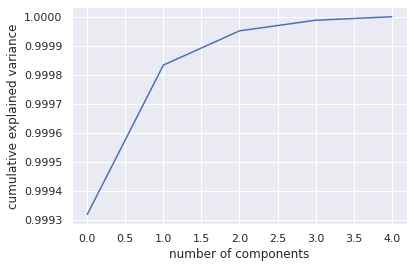

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
pca=PCA(n_components=3)
X_new=pca.fit_transform(X)

In [ ]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)

In [ ]:
knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA: ",knn_pca.score(X_train_new,y_train),"%")
print("Test score after PCA: ",knn_pca.score(X_test_new,y_test),"%")

Train score after PCA:  0.9619047619047619 %
Test score after PCA:  0.9777777777777777 %


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


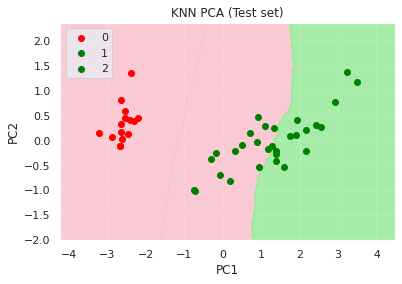

In [ ]:
# Visualising the Test set results
classifier = knn_pca
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_new, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel(),np.zeros((X1.shape[0],X1.shape[1])).ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN PCA (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# PCA for Data Visualization

## PCA Projection to 2D

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

df = px.data.iris()
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=df['species'])
fig.show()

# Visualize PCA with px.scatter_3d

In [ ]:
df = px.data.iris()
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['species'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [ ]:
pca.explained_variance_ratio_

array([0.92461621, 0.05301557, 0.01718514])

Final answers for the assignment:


1. Dataset has been described and feature scaaling has been applied after train-test-split

2. EDA has been done along with visualization of correlations.

3. PCA has 3 components.

4. array([0.92461621, 0.05301557, 0.01718514]) is explained_variance_ratio_

5. k = 3

6. 𝐾 principal components directions and correlations of the 𝐾 principal components with the original variables have been printed

7. Eigenvalues and vectors have been printed

8. The samples projected into the 𝐾 first PCs have been plotted.

9. Samples have been colored
 by their species.